# Vikrant Rajput

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data Imported")
dataset.head()

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analyse

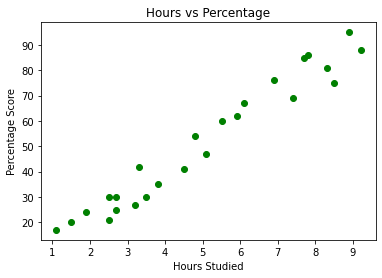

In [3]:
plt.scatter(x=dataset['Hours'], y=dataset['Scores'], marker='o',c='green')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

- It is look like a linear line regression. We need to predict a line with right coff and y-intercept.

# Prepare data

In [9]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Building & Training Model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete")

Training complete


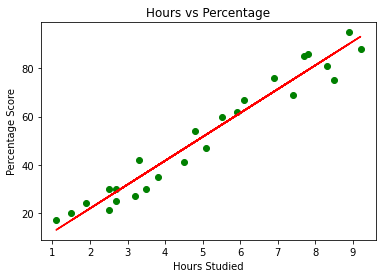

In [13]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(x=X, y=y, marker='o',c='green')
plt.plot(X,line,c='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making Prediction

In [17]:
y_pred = regressor.predict(X_test)
print("y_test: ", y_test)
print("y_pred: ", np.round(y_pred, 2))

y_test:  [20 27 69 30 62]
y_pred:  [16.88 33.73 75.36 26.79 60.49]


In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Diffrence':abs(y_test-y_pred)})  
df

,Actual,Predicted,Diffrence
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


# Making Custom Prediction -------- 9.25h/day

In [20]:
hours =[[9.25]]
custom_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(custom_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evoluting Model performance

In [22]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
